In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json as js

In [3]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.reuters.load_data(num_words=10000)

In [4]:
def vectorize_seq(sequences, dim=10000):

    result_tensor = np.zeros((len(sequences), dim))
    for (seq_index, sequence) in enumerate(sequences):
        result_tensor[seq_index, sequence] = 1
    
    return result_tensor

In [5]:
def vectorize_labels(labels, dim=46):

    result_tensor = np.zeros((len(labels), dim))
    for (label_index, label) in enumerate(labels):
        result_tensor[label_index, label] = 1
    
    return result_tensor

In [6]:
train_data_vectorized = vectorize_seq(train_data)
test_data_vectorized = vectorize_seq(test_data)
train_labels_vectorized = vectorize_labels(train_labels)
test_labels_vectorized = vectorize_labels(test_labels)

In [13]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(tf.keras.layers.Dense(64, activation="tanh"))
model.add(tf.keras.layers.Dense(64, activation="tanh"))
model.add(tf.keras.layers.Dense(46, activation="softmax"))

In [14]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [15]:
train_validation_data = train_data_vectorized[:1000]
partial_train_data = train_data_vectorized[1000:]
train_validation_labels = train_labels_vectorized[:1000]
partial_train_labels = train_labels_vectorized[1000:]

In [16]:
history = model.fit(partial_train_data,
                    partial_train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(train_validation_data, train_validation_labels))


Epoch 1/20
16/16 [==============================] - 1s 34ms/step - loss: 2.4844 - accuracy: 0.5030 - val_loss: 1.7114 - val_accuracy: 0.6200
Epoch 2/20
16/16 [==============================] - 0s 23ms/step - loss: 1.4963 - accuracy: 0.6877 - val_loss: 1.3607 - val_accuracy: 0.7060
Epoch 3/20
16/16 [==============================] - 0s 23ms/step - loss: 1.1597 - accuracy: 0.7542 - val_loss: 1.1971 - val_accuracy: 0.7350
Epoch 4/20
16/16 [==============================] - 0s 24ms/step - loss: 0.9262 - accuracy: 0.8102 - val_loss: 1.0788 - val_accuracy: 0.7460
Epoch 5/20
16/16 [==============================] - 0s 26ms/step - loss: 0.7514 - accuracy: 0.8517 - val_loss: 0.9856 - val_accuracy: 0.7870
Epoch 6/20
16/16 [==============================] - 0s 24ms/step - loss: 0.6062 - accuracy: 0.8851 - val_loss: 0.9509 - val_accuracy: 0.8090
Epoch 7/20
16/16 [==============================] - 0s 24ms/step - loss: 0.4943 - accuracy: 0.9114 - val_loss: 0.9100 - val_accuracy: 0.7970
Epoch 8/20
16

C:\Users\1\AppData\Local\Temp\ipykernel_1848\2244052175.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


loss info: (20,), loss_val_info: (20,), acc_info: (20,), acc_val_info: (20,), epochs: range(0, 20)


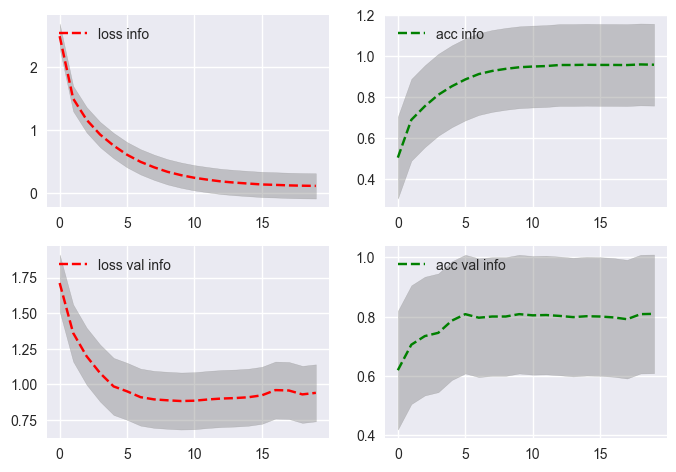

In [17]:
fig, axis = plt.subplots(ncols=2, nrows=2)
plt.style.use("seaborn")

loss_info = np.asarray(history.history["loss"])
loss_val_info = np.asarray(history.history["val_loss"])
acc_info = np.asarray(history.history["accuracy"])
acc_val_info = np.asarray(history.history["val_accuracy"])
epochs_range = range(0, len(acc_info))
print(f"loss info: {loss_info.shape}, loss_val_info: {loss_val_info.shape}, acc_info: {acc_info.shape}, acc_val_info: {acc_val_info.shape}, epochs: {epochs_range}")

axis[0, 0].plot(epochs_range, loss_info, color="red", linestyle="--", label="loss info")
axis[0, 0].fill_between(epochs_range, loss_info - 0.2, loss_info + 0.2, color="gray", alpha=0.4)
axis[0, 1].plot(epochs_range, acc_info, color="green", linestyle="--", label="acc info")
axis[0, 1].fill_between(epochs_range, acc_info - 0.2, acc_info + 0.2, color="gray", alpha=0.4)

axis[1, 0].plot(epochs_range, loss_val_info, color="red", linestyle="--", label="loss val info")
axis[1, 0].fill_between(epochs_range, loss_val_info - 0.2, loss_val_info + 0.2, color="gray", alpha=0.4)
axis[1, 1].plot(epochs_range, acc_val_info, color="green", linestyle="--", label="acc val info")
axis[1, 1].fill_between(epochs_range, acc_val_info - 0.2, acc_val_info + 0.2, color="gray", alpha=0.4)

axis[0, 0].legend(loc="upper left")
axis[0, 1].legend(loc="upper left")
axis[1, 0].legend(loc="upper left")
axis[1, 1].legend(loc="upper left")

plt.show()


In [12]:
prediction = model.predict(test_data_vectorized)
print(prediction)

71/71 [==============================] - 0s 2ms/step
[[3.23263180e-07 2.53847998e-06 2.18011351e-08 ... 9.69795444e-09
  2.66184408e-08 2.54411589e-07]
 [5.86587266e-05 9.94108617e-04 2.47491087e-04 ... 2.43668609e-07
  2.75860117e-08 1.95817029e-06]
 [2.58394191e-03 9.78429914e-01 6.83372433e-04 ... 1.07648841e-04
  2.31453567e-04 1.91647661e-04]
 ...
 [1.53492310e-05 1.11214278e-04 6.66937012e-06 ... 4.94736014e-07
  1.18542384e-05 2.83285390e-05]
 [7.92725105e-03 1.67321220e-01 9.94655676e-03 ... 8.83904402e-04
  5.63218817e-03 1.41609262e-03]
 [4.56406793e-04 8.90303314e-01 2.55893357e-03 ... 1.59809915e-05
  1.02596576e-04 6.25234970e-05]]
